In [1]:
# General imports 
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# RMF_TOOL import 
import rmf_tool.src.rmf_tool as rmf

# The simulation values for JSQ have been pre-computed : to load them 
import rmf_tool.misc.jsqD_simulate.average_valueJSQ as jsqSimu

## Definition of the model 

The tool "rmf" contains the generic code to compute the mean field expansions. In the folder *parameters_dChoice_transient*, we define the drift and its derivatives for the special case of the supermarket model. We use them to define a new class (supermarketModel) that we can then use to compute the various expansions.

In [2]:
import parameters_dChoice_transient as dChoice

class supermarketModel(rmf.DDPP):
    def __init__(self,n,rho,d=2):
        super(supermarketModel,self).__init__()
        self.add_transition(np.zeros(n),lambda x:x)
        self.n   = n
        self.rho = rho
        self.d   = d
        self.set_initial_state(np.zeros(n))

    def fixed_point(self):
        return(dChoice.fixedPoint(self.n,self.rho,self.d))
        
    def defineDrift(self,evaluate_at=None):
        return(dChoice.defineDrift(self.n,self.rho,self.d,evaluate_at))

    def defineDriftDerivativeQ(self,evaluate_at=None):
        return(dChoice.defineDriftDerivativeQ(self.n,self.rho,self.d,evaluate_at))

    def defineDriftSecondDerivativeQderivativesR(self,evaluate_at=None):
        return(dChoice.defineDriftSecondDerivativeQderivativesR(self.n,self.rho,self.d,evaluate_at))
    
    def setInitialNumberOfJobs(self,x):
        x0 = np.zeros(self.n)
        i = 0
        while (i+1<x and i < self.n):
            x0[i] = 1
            i+=1
        if i < self.n :
            x0[i] = x-i
        self.set_initial_state(x0)


## Average queue length in steady-state

### (Table 2&4 of the paper)

In [3]:
for rho in [.7,0.9,0.95]:
    for d in [2,3,4]:
        model = supermarketModel(20,rho,d)
        model.setInitialNumberOfJobs(1)
        X,V,A,_ = model.meanFieldExpansionSteadyState(order=2)
        for N in [10,20,50,100]:
            print(N,'&',d,'&',rho,'&   \t',end='')
            simu=np.mean(jsqSimu.loadAllSteadyStateSimu(rho=rho,d=d,N=N),0)
            [print('{:.4f}'.format(x),end='\t & ') for x in [sum(X),sum(X+V/N),sum(X+V/N+A/N**2),sum(simu)]]
            print('\\\\')


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/sparse/linalg/isolve/_gcrotmk.py:178: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  y, _, _, _, = lstsq(R[:j+1,:j+1], Q[0,:j+1].conj())


10 & 2 & 0.7 &   	1.1301	 & 1.2150	 & 1.2191	 & 1.2193	 & \\
20 & 2 & 0.7 &   	1.1301	 & 1.1726	 & 1.1736	 & 1.1737	 & \\
50 & 2 & 0.7 &   	1.1301	 & 1.1471	 & 1.1473	 & 1.1471	 & \\
100 & 2 & 0.7 &   	1.1301	 & 1.1386	 & 1.1386	 & 1.1387	 & \\
10 & 3 & 0.7 &   	0.9498	 & 1.0378	 & 1.0473	 & 1.0454	 & \\
20 & 3 & 0.7 &   	0.9498	 & 0.9938	 & 0.9962	 & 0.9959	 & \\
50 & 3 & 0.7 &   	0.9498	 & 0.9674	 & 0.9678	 & 0.9679	 & \\
100 & 3 & 0.7 &   	0.9498	 & 0.9586	 & 0.9587	 & 0.9587	 & \\
10 & 4 & 0.7 &   	0.8686	 & 0.9604	 & 0.9674	 & 0.9698	 & \\
20 & 4 & 0.7 &   	0.8686	 & 0.9145	 & 0.9163	 & 0.9169	 & \\
50 & 4 & 0.7 &   	0.8686	 & 0.8870	 & 0.8873	 & 0.8875	 & \\
100 & 4 & 0.7 &   	0.8686	 & 0.8778	 & 0.8779	 & 0.8780	 & \\
10 & 2 & 0.9 &   	2.3527	 & 2.7513	 & 2.8045	 & 2.8003	 & \\
20 & 2 & 0.9 &   	2.3527	 & 2.5520	 & 2.5653	 & 2.5662	 & \\
50 & 2 & 0.9 &   	2.3527	 & 2.4324	 & 2.4345	 & 2.4350	 & \\
100 & 2 & 0.9 &   	2.3527	 & 2.3925	 & 2.3930	 & 2.3931	 & \\
10 & 3 & 0.9 &   	1.

### Steady-state : queue length distribution (Table 3 of the paper)

In [4]:
for (rho,d,N) in [(0.9,2,10),(0.95,2,20),(0.9,4,10),(0.95,4,20)]:
    model = supermarketModel(20,rho,d)
    model.setInitialNumberOfJobs(1)
    X,V,A,_ = model.meanFieldExpansionSteadyState(order=2)
    simu=np.mean(jsqSimu.loadAllSteadyStateSimu(rho=rho,d=d,N=N),0)
    for x in [X,X+V/N,X+V/N+A/N**2,simu]:
        [print('& {:.3f}'.format(a),end='\t ') for a in x[1:6]]
        print('\\\\')
    print('\\hline')

& 0.729	 & 0.478	 & 0.206	 & 0.038	 & 0.001	 \\
& 0.742	 & 0.544	 & 0.361	 & 0.179	 & 0.025	 \\
& 0.741	 & 0.533	 & 0.316	 & 0.194	 & 0.116	 \\
& 0.741	 & 0.534	 & 0.327	 & 0.170	 & 0.077	 \\
\hline
& 0.857	 & 0.698	 & 0.463	 & 0.204	 & 0.039	 \\
& 0.861	 & 0.721	 & 0.544	 & 0.371	 & 0.184	 \\
& 0.861	 & 0.719	 & 0.527	 & 0.321	 & 0.210	 \\
& 0.861	 & 0.719	 & 0.530	 & 0.334	 & 0.178	 \\
\hline
& 0.590	 & 0.109	 & 0.000	 & 0.000	 & 0.000	 \\
& 0.679	 & 0.450	 & 0.007	 & 0.000	 & 0.000	 \\
& 0.652	 & 0.341	 & 0.131	 & 0.000	 & 0.000	 \\
& 0.657	 & 0.344	 & 0.140	 & 0.051	 & 0.018	 \\
\hline
& 0.774	 & 0.341	 & 0.013	 & 0.000	 & 0.000	 \\
& 0.802	 & 0.600	 & 0.178	 & 0.000	 & 0.000	 \\
& 0.795	 & 0.429	 & 0.578	 & 0.001	 & 0.000	 \\
& 0.798	 & 0.509	 & 0.236	 & 0.092	 & 0.034	 \\
\hline


## Average queue length v.s. time for JSQ(2)

In [18]:
rho=0.9
d=2
model = supermarketModel(9,rho,d)
model.setInitialNumberOfJobs(2.8 if rho==0.9 else 3.6)
T,X,V,A,_ = model.meanFieldExpansionTransient(time=100,order=2)


average over  100000 simulations
average over  20000 simulations
average over  200 simulations
average over  100000 simulations
average over  200 simulations


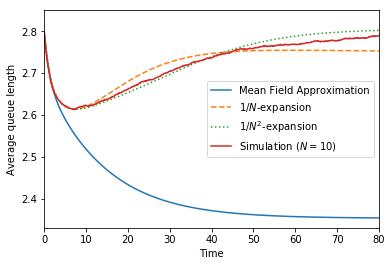

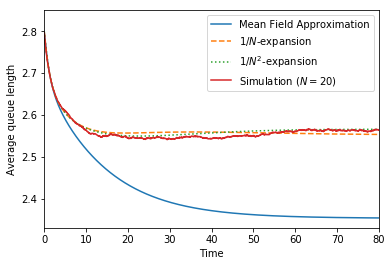

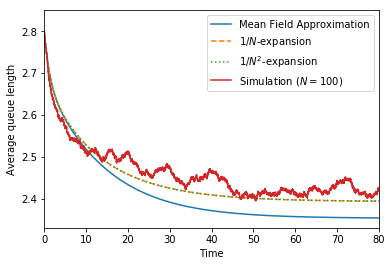

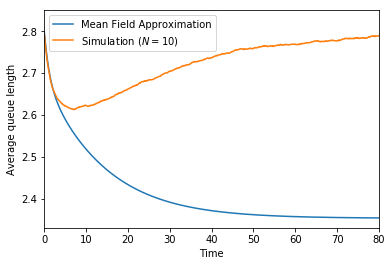

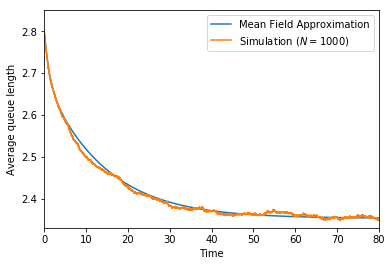

In [19]:

for N in [10,20,100]:
    f=plt.figure()
    f.set_size_inches((6,4))
    plt.clf()
    Tsimu,Ysimu = jsqSimu.loadTransientSimu(N,rho,d,2.8 if rho==0.9 else 3.6)
    plt.plot(T,np.sum(X,1))
    plt.plot(T,np.sum(X+V/N,1),'--')
    plt.plot(T,np.sum(X+V/N+A/N**2,1),':')
    plt.plot(Tsimu,np.sum(Ysimu,1)-1)
    plt.xlim([0, 80 if rho==0.9 else 120])
    if rho==0.9: plt.ylim([2.33, 2.85])
    plt.xlabel('Time')
    plt.ylabel('Average queue length')
    plt.legend(('Mean Field Approximation','$1/N$-expansion','$1/N^2$-expansion','Simulation ($N={}$)'.format(N)))
    f.savefig('output_pdfs/twoChoice_refRefTransient_N{}_rho{}.pdf'.format(N,int(100*rho)),bbox_inches='tight')

# for slides : comparison mean field v.s. simu (N=10)
for N in [10,1000]:
    f = plt.figure()
    f.set_size_inches((6,4))
    plt.clf()
    Tsimu,Ysimu = jsqSimu.loadTransientSimu(N,rho,d,2.8 if rho==0.9 else 3.6)
    plt.plot(T,np.sum(X,1))
    plt.plot(Tsimu,np.sum(Ysimu,1)-1)
    plt.xlim([0, 80 if rho==0.9 else 120])
    if rho==0.9: plt.ylim([2.33, 2.85])
    plt.xlabel('Time')
    plt.ylabel('Average queue length')
    plt.legend(('Mean Field Approximation','Simulation ($N={}$)'.format(N)))
    f.savefig('output_pdfs/twoChoice_transient_N{}_rho{}.pdf'.format(N,int(100*rho)),bbox_inches='tight')

## Analysis of the simulation time

In [21]:
import pandas as pd
import time as ti

try:
    times = pd.read_csv('executionTime.csv')
except:
    times = pd.DataFrame(columns=['K','rho','isTransient','order','time'])

number_of_already_computed_simulations = len(times)

for order in [1,2]:
    for isTransient in [True,False]:
        if order==1:
            myK = ([25,50,75,100,150,200] if isTransient else [25,50,75,100,150,200,250,300,400,500])
        else : 
            myK = ([2,4,6,8,10,12,14,16,18] if isTransient else [5,10,15,20,25,30,35,40])
        for K in myK:
            for i in range(sum((times.K==K)&(times.isTransient==isTransient)&(times.order==order)),6):
                model = supermarketModel(K,rho,d)
                start_time=ti.time()
                if isTransient: 
                    _ = model.meanFieldExpansionTransient(order=order)
                else:
                    _ = model.meanFieldExpansionSteadyState(order=order)
                times=times.append({'K':K,'isTransie<nt':isTransient,'rho':rho,
                                    'order':order,'time':ti.time()-start_time},ignore_index=True)
                print(K,'done')

if len(times) > number_of_already_computed_simulations:
    times.to_csv('executionTime.csv', index=False)
else:
    print('all simulations were already computed.\n ### To force recomputing, remove the file "executionTime"')

all simulations were already computed.
 ### To force recomputing, remove the file "executionTime"


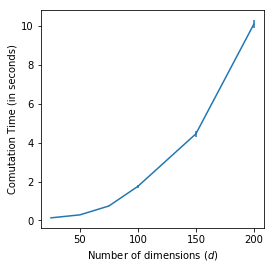

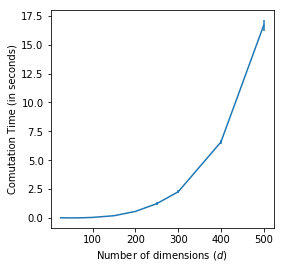

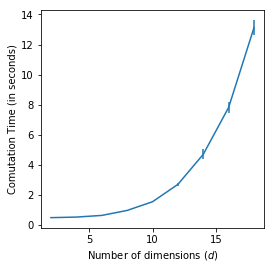

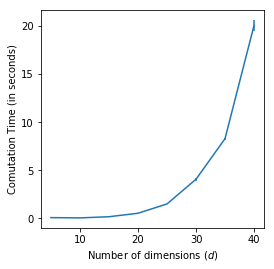

In [22]:
times=pd.read_csv('executionTime.csv')
def averageTimes(order,isTransient):
    df = times[(times.isTransient==isTransient)&(times.order==order)].groupby('K')
    df1 = df.agg({'time':['mean','std','count']})
    df2 = df1.time
    return np.array(df2.index),np.array(df2['mean']), np.array(df2['std'])/np.sqrt(np.array(df2['count']))
#for order in [1]:#,2]:
#    for isTransient in [True,False]:
#        plt.figure()
#        df = times[(times.isTransient==isTransient)&(times.order==order)]
#        df.boxplot(column='time',by='K')
def plotAverageTime(order,isTransient):
    x,y,e=averageTimes(order,isTransient)
    f=plt.figure()
    f.set_size_inches((4,4))
    plt.errorbar(x,y,e)
    plt.xlabel('Number of dimensions ($d$)')
    plt.ylabel('Comutation Time (in seconds)')
    f.savefig('output_pdfs/jsqD_computationTime_order{}_{}.pdf'.format(
        order,'transient' if isTransient else 'steadyState'),
            bbox_inches='tight')
    return f
f=plotAverageTime(1,True)
f=plotAverageTime(1,False)
f=plotAverageTime(2,True)
f=plotAverageTime(2,False)

# For slides

In [17]:
for rho in [0.9]:
    for d in [2]:
        model = supermarketModel(20,rho,d)
        model.setInitialNumberOfJobs(1)
        X,V,A,_ = model.meanFieldExpansionSteadyState(order=2)
        simus=[sum(np.mean(jsqSimu.loadAllSteadyStateSimu(rho=rho,d=d,N=N),0)) for N in [10,20,50,100]]
        mf = [sum(X) for N in [10,20,50,100]]
        ref = [sum(X+V/N) for N in [10,20,50,100]]
        refRef = [sum(X+V/N+A/N**2) for N in [10,20,50,100]]
        for (name,values) in [('Mean Field',mf),('$1/N$-expansion',ref),('$1/N^2$-expansion',refRef),('Simulation',simus)]:
            print(name, end='\t & ')
            for x in values: print('{:.4f}'.format(x),end='\t & ');
            print('\\\\')


Mean Field	 & 2.3527	 & 2.3527	 & 2.3527	 & 2.3527	 & \\
$1/N$-expansion	 & 2.7513	 & 2.5520	 & 2.4324	 & 2.3925	 & \\
$1/N^2$-expansion	 & 2.8045	 & 2.5653	 & 2.4345	 & 2.3930	 & \\
Simulation	 & 2.8003	 & 2.5662	 & 2.4350	 & 2.3931	 & \\


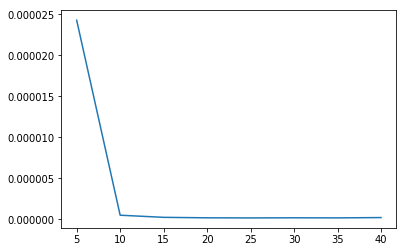

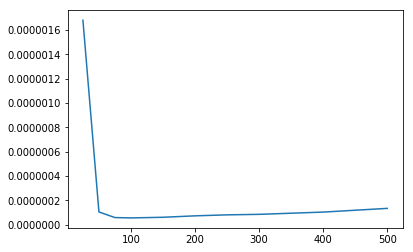

In [35]:
x,y,e=averageTimes(2,isTransient=False)
plt.plot(x,y/x**5)
plt.figure()
x,y,e=averageTimes(1,isTransient=False)
plt.plot(x,y/x**3)